<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.878303,87.976996,-0.000085,196.855213,196.855247,-0.000033
1,0.0,1.0,83.374980,35.010299,-0.000802,128.384477,128.385058,-0.000581
2,0.0,2.0,45.365111,30.885953,-0.001084,86.249980,86.251014,-0.001034
3,0.0,3.0,41.809173,60.989043,-0.000770,112.797445,112.798324,-0.000879
4,0.0,4.0,55.532205,97.225586,0.000017,162.757808,162.758000,-0.000192
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.512877,45.067147,0.001217,89.581241,89.580297,0.000944
119996,999.0,116.0,32.680571,83.927490,-0.000115,126.607947,126.607952,-0.000005
119997,999.0,117.0,97.529958,80.535114,0.000149,188.065222,188.065220,0.000002
119998,999.0,118.0,31.734642,56.001625,0.000069,97.736336,97.736425,-0.000089


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    98.878303  87.976996 -0.000085  196.855213  196.855247 -0.000033
      1.0    83.374980  35.010299 -0.000802  128.384477  128.385058 -0.000581
      2.0    45.365111  30.885953 -0.001084   86.249980   86.251014 -0.001034
      3.0    41.809173  60.989043 -0.000770  112.797445  112.798324 -0.000879
      4.0    55.532205  97.225586  0.000017  162.757808  162.758000 -0.000192
...                ...        ...       ...         ...         ...       ...
999.0 115.0  34.512877  45.067147  0.001217   89.581241   89.580297  0.000944
      116.0  32.680571  83.927490 -0.000115  126.607947  126.607952 -0.000005
      117.0  97.529958  80.535114  0.000149  188.065222  188.065220  0.000002
      118.0  31.734642  56.001625  0.000069   97.736336   97.736425 -0.000089
      119.0  29.374618  80.516437 -0.000553  119.890502  119.890967 -0.000465

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    98.878303  87.976996 -0.000085  196.855213  196.855247 -0.000033
      1.0    83.374980  35.010299 -0.000802  128.384477  128.385058 -0.000581
      2.0    45.365111  30.885953 -0.001084   86.249980   86.251014 -0.001034
      3.0    41.809173  60.989043 -0.000770  112.797445  112.798324 -0.000879
      4.0    55.532205  97.225586  0.000017  162.757808  162.758000 -0.000192
...                ...        ...       ...         ...         ...       ...
999.0 115.0  34.512877  45.067147  0.001217   89.581241   89.580297  0.000944
      116.0  32.680571  83.927490 -0.000115  126.607947  126.607952 -0.000005
      117.0  97.529958  80.535114  0.000149  188.065222  188.065220  0.000002
      118.0  31.734642  56.001625  0.000069   97.736336   97.736425 -0.000089
      119.0  29.374618  80.516437 -0.000553  119.890502  119.890967 -0.000465

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.878303,87.976996,-0.000085,196.855213,196.855247,-0.000033
1,0.0,1.0,83.374980,35.010299,-0.000802,128.384477,128.385058,-0.000581
2,0.0,2.0,45.365111,30.885953,-0.001084,86.249980,86.251014,-0.001034
3,0.0,3.0,41.809173,60.989043,-0.000770,112.797445,112.798324,-0.000879
4,0.0,4.0,55.532205,97.225586,0.000017,162.757808,162.758000,-0.000192
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.512877,45.067147,0.001217,89.581241,89.580297,0.000944
119996,999.0,116.0,32.680571,83.927490,-0.000115,126.607947,126.607952,-0.000005
119997,999.0,117.0,97.529958,80.535114,0.000149,188.065222,188.065220,0.000002
119998,999.0,118.0,31.734642,56.001625,0.000069,97.736336,97.736425,-0.000089


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    98.878303  87.976996 -0.000085  196.855213  196.855247 -0.000033
      1.0    83.374980  35.010299 -0.000802  128.384477  128.385058 -0.000581
      2.0    45.365111  30.885953 -0.001084   86.249980   86.251014 -0.001034
      3.0    41.809173  60.989043 -0.000770  112.797445  112.798324 -0.000879
      4.0    55.532205  97.225586  0.000017  162.757808  162.758000 -0.000192
...                ...        ...       ...         ...         ...       ...
999.0 115.0  34.512877  45.067147  0.001217   89.581241   89.580297  0.000944
      116.0  32.680571  83.927490 -0.000115  126.607947  126.607952 -0.000005
      117.0  97.529958  80.535114  0.000149  188.065222  188.065220  0.000002
      118.0  31.734642  56.001625  0.000069   97.736336   97.736425 -0.000089
      119.0  29.374618  80.516437 -0.000553  119.890502  119.890967 -0.000465

[120000 rows x 6 columns]

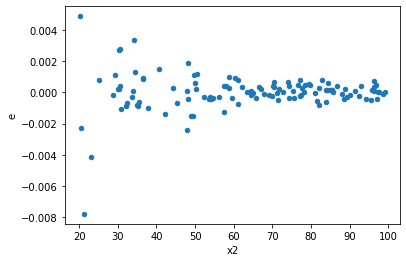

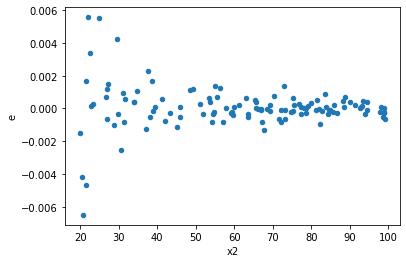

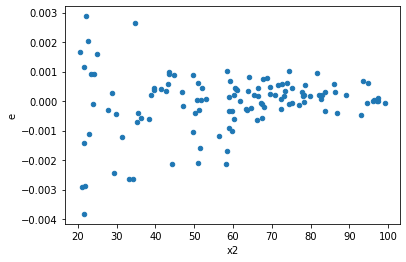

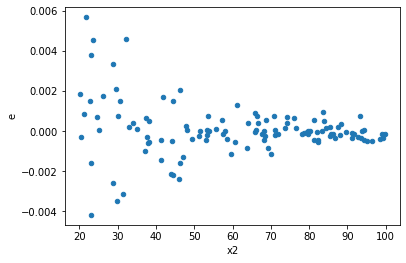

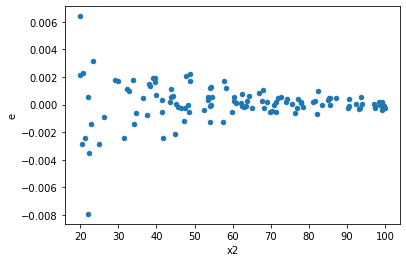

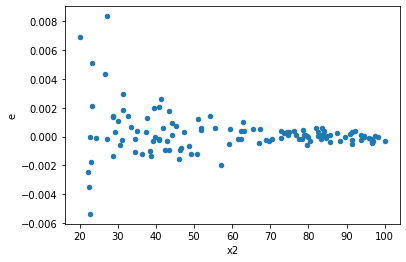

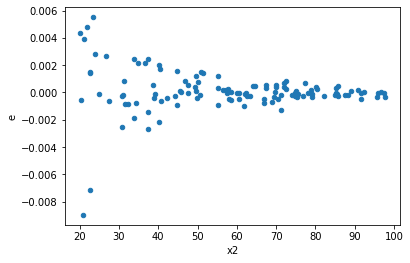

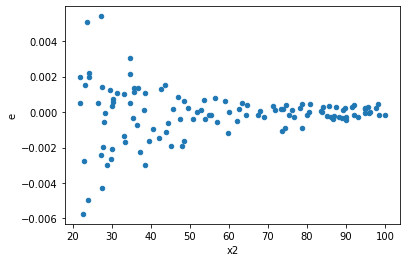

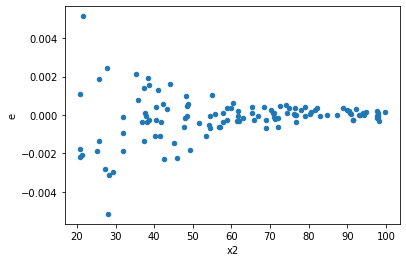

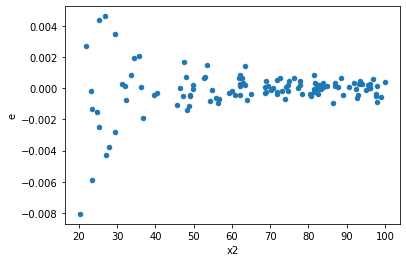

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,56.0,60.0,2.2925864031787122e-05,0.00015552417211374894,4.0939042913905577e-07,2.592069535229149e-06,6.331534278122346,3.162714534710176e-11,0.9999999999841864,1.581357267355088e-11,Reject001=0 : Heteroscedasticity
1.0,56.0,60.0,1.5470965052271635e-05,0.0002074004570986619,2.7626723307627923e-07,3.456674284977698e-06,12.512067560409118,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,54.0,62.0,1.936973801470205e-05,0.000102459921701109,3.5869885212411205e-07,1.6525793822759517e-06,4.607149904411037,1.8617146713140187e-08,0.9999999906914266,9.308573356570093e-09,Reject001=0 : Heteroscedasticity
4.0,47.0,69.0,1.1478213719813645e-05,0.0002186230275620299,2.4421731318752435e-07,3.1684496748120276e-06,12.973894575521378,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,66.0,50.0,3.275793116977746e-05,0.00023509502307074675,4.963322904511736e-07,4.701900461414935e-06,9.473291486114746,1.0258460747536446e-13,0.9999999999999487,5.129230373768223e-14,Reject001=0 : Heteroscedasticity
6.0,64.0,52.0,3.945434168152884e-05,0.0002654465609197949,6.164740887738881e-07,5.104741556149902e-06,8.280545199073616,8.097966741615892e-13,0.9999999999995951,4.048983370807946e-13,Reject001=0 : Heteroscedasticity
8.0,47.0,69.0,6.74897414613231e-06,0.0001474923342914826,1.435951945985598e-07,2.1375700621954e-06,14.88608353623025,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,62.0,54.0,1.591251915989384e-05,0.00022524595740286375,2.5665353483699743e-07,4.171221433386366e-06,16.252343596341035,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,51.0,65.0,1.0543948932100131e-05,7.91411577855276e-05,2.067440967078457e-07,1.2175562736235015e-06,5.8891948694624885,7.285816394642097e-11,0.9999999999635709,3.6429081973210486e-11,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,60.0,2.2925864031787122e-05,0.00015552417211374894,4.0939042913905577e-07,2.592069535229149e-06,6.331534278122346,3.162714534710176e-11,Reject001=0 : Heteroscedasticity
1.0,56.0,60.0,1.5470965052271635e-05,0.0002074004570986619,2.7626723307627923e-07,3.456674284977698e-06,12.512067560409118,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,54.0,62.0,1.936973801470205e-05,0.000102459921701109,3.5869885212411205e-07,1.6525793822759517e-06,4.607149904411037,1.8617146713140187e-08,Reject001=0 : Heteroscedasticity
3.0,64.0,52.0,0.00016680372431123635,2.3063377269562513e-05,2.606308192363068e-06,4.4352648595312526e-07,0.1701742285324254,8.685952372484519e-11,Reject001=0 : Heteroscedasticity
4.0,47.0,69.0,1.1478213719813645e-05,0.0002186230275620299,2.4421731318752435e-07,3.1684496748120276e-06,12.973894575521378,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,66.0,50.0,3.275793116977746e-05,0.00023509502307074675,4.963322904511736e-07,4.701900461414935e-06,9.473291486114746,1.0258460747536446e-13,Reject001=0 : Heteroscedasticity
6.0,64.0,52.0,3.945434168152884e-05,0.0002654465609197949,6.164740887738881e-07,5.104741556149902e-06,8.280545199073616,8.097966741615892e-13,Reject001=0 : Heteroscedasticity
7.0,56.0,60.0,0.00020323082388498128,5.457386554692034e-05,3.6291218550889515e-06,9.095644257820057e-07,0.25062934288264943,5.270467233996156e-07,Reject001=0 : Heteroscedasticity
8.0,47.0,69.0,6.74897414613231e-06,0.0001474923342914826,1.435951945985598e-07,2.1375700621954e-06,14.88608353623025,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    980
Reject001=1 : Homoscedasticity       20
Name: Result_test, dtype: int64